In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab as plt
from matplotlib import animation

from tqdm import tqdm

# Разностная схема (8)

Объявляем начальные данные

In [32]:
currant = 0.8
speed = 1
h = 0.1
tau = currant*h/speed
length = 5
num_z = int(2*length/h)
num_t = 1000
t_set = np.arange(0, num_t*tau, tau)
a = length/5
z = np.arange(0, 2*length, h) - length

#print(z)

def phi(z):
    return np.exp(-np.square(z)/2/a/a)

def dalamber(z,t):
    return (phi(z - speed*t)+phi(z + speed*t))/2

    
E = np.zeros((num_z, num_t))
E_final = np.zeros((num_z, num_t))
E_true = np.zeros((num_z, num_t))
E[:, 0] = phi(z)


[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9]


In [33]:
def solve8(E, n1, n2, r):
    for j in range(1, n1 - 1):
        E[j,1] = E[j,0] + r*r/2*(E[j+1,0]-2*E[j,0] + E[j-1,0])
    for n in range(1, n2 - 1):
        for j in range(1, n1 - 1):
            E[j,n+1] = 2*E[j,n] - E[j,n-1] + r*r*(E[j+1,n] - 2*E[j,n] + E[j-1,n])
    return E

In [34]:
E_final = solve8(E, num_z, num_t, currant)

for n in range(num_t):
    E_true[:, n] = dalamber(z, n*tau)

Визуализация

<IPython.core.display.Javascript object>


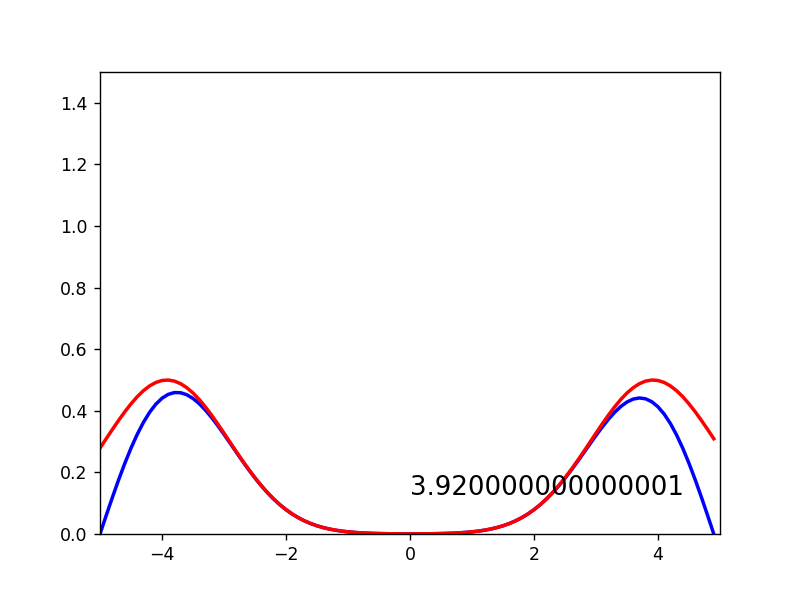

In [41]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(-5, 5), ylim=(0, E_final.max() + 0.5))
line, = ax.plot([], [], lw=2, color = 'blue')
line_true, = ax.plot([], [], lw=2, color = 'red')

time_stamp = ax.text(0.5,0.1,0,verticalalignment='center',
                        horizontalalignment='left',
                        transform=ax.transAxes,fontsize=15)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line_true.set_data([], [])
    return line, line_true

# animation function.  This is called sequentially
def animate(i):
    E_final_t = E_final[:len(z), i]
    line.set_data(z, E_final_t)
    
    E_true_t = E_true[:len(z), i]
    line_true.set_data(z, E_true_t)

    time_stamp.set_text(t_set[i])
    return line,line_true, time_stamp

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=10, blit=False, repeat=True)

plt.show()

Сходимость

# Разностная схема (10)

Объявляем начальные данные

In [245]:
currant = 0.5
speed = 0.5
h = 0.1
tau = currant*h/speed
length = 5
num_z = int(2*length/h)
print(num_z)
num_t = 2000
t_set = np.arange(0, num_t*tau, tau)
a = length/5
#z = np.arange(0, 2*length, h) - length
z = np.linspace(0, 2*length, num_z) - length

#print(z)

    
E = np.zeros((num_z, num_t))
E_final = np.zeros((num_z, num_t))
E_true = np.zeros((num_z, num_t))
H = np.zeros((num_z, num_t - 1))

E[:, 0] = phi(z)

for j in range(num_z - 1):
    H[j,0] = currant/2 * (phi(z[j+1]) - phi(z[j]))


100


In [246]:
def solve10(E, H, n1, n2, r):
    for i in range(0, n2 - 1):
        for j in range(1, n1 - 1):
            E[j,i+1] = E[j,i] + r*(H[j,i] - H[j-1,i])
        if (i!=n2 - 2):
            for j in range(0, n1 - 1):
                H[j,i+1] = H[j,i] + r*(E[j+1,i+1] - E[j,i+1])
    return E

In [247]:
E_final = solve10(E, H, num_z, num_t, currant)

for n in range(num_t):
    E_true[:, n] = dalamber(z, n*tau)

<IPython.core.display.Javascript object>


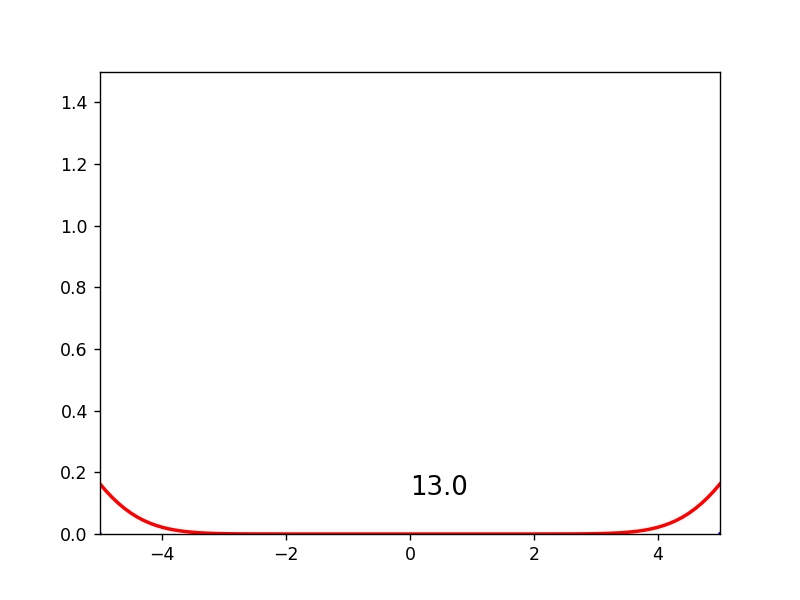

In [250]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(-5, 5), ylim=(0, E_final.max() + 0.5))
line, = ax.plot([], [], lw=2, color = 'blue')
line_true, = ax.plot([], [], lw=2, color = 'red')

time_stamp = ax.text(0.5,0.1,0,verticalalignment='center',
                        horizontalalignment='left',
                        transform=ax.transAxes,fontsize=15)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line_true.set_data([], [])
    return line, line_true

# animation function.  This is called sequentially
def animate(i):
    E_final_t = E_final[:len(z), i]
    line.set_data(z, E_final_t)
    
    E_true_t = E_true[:len(z), i]
    line_true.set_data(z, E_true_t)

    time_stamp.set_text(t_set[i])
    return line,line_true, time_stamp

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=10, blit=False, repeat=True)

plt.show()

Сходимость

# Разностная схема (12)

In [284]:
currant = 0.5
speed = 0.5
h = 0.1
tau = currant*h/speed
length = 5
num_z = int(2*length/h)
num_t = 2000
t_set = np.arange(0, num_t*tau, tau)
a = length/5
#z = np.arange(0, 2*length, h) - length
z = np.linspace(0, 2*length, num_z) - length
zh = np.linspace(h/2, 2*length, num_z) - length
A0 = length
delta = length/10
const = 2*np.pi*tau

#print(z)

    
sigma = np.zeros(num_z)
sigmaH = np.zeros(num_z)
E = np.zeros((num_z, num_t))
E_final = np.zeros((num_z, num_t))
E_true = np.zeros((num_z, num_t))
H = np.zeros((num_z, num_t - 1))

E[:, 0] = phi(z)

for j in range(num_z - 1):
    H[j,0] = currant/2 * (phi(z[j+1]) - phi(z[j]))

    

def sigma_PML(A0, z, l, delta, n):
    sigma[z < -l + delta]  = A0 * ((z[z < -l + delta]  + l - delta)/delta) ** 2
    sigma[z > l - delta] = A0 * ((z[z > l - delta] - l + delta)/delta) ** 2
    return sigma

sigma = sigma_PML(A0, z, length, delta, num_z)
sigmaH = sigma_PML(A0, zh, length, delta, num_z)
    

In [282]:
z

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [279]:
def solve12(E, H, n1, n2, s, sh, r):
    for n in range(0, n2 - 1):
        for j in range(1, n1 - 1):
            E[j, n+1] = (E[j, n] * (1 - const*s[j]) + (H[j, n] - H[j-1, n]) * r) / (1 + s[j])
        if (n!=n2-2):
            for j in range(0, n1 - 1):
                H[j, n+1] = (H[j, n] * (1 - sh[j]) + (E[j+1, n+1] - E[j, n+1]) * r) / (1 + sh[j])
    return E

In [280]:
E_final = solve12(E, H, num_z, num_t, sigma, sigmaH, currant)

for n in range(num_t):
    E_true[:, n] = dalamber(z, n*tau)

<IPython.core.display.Javascript object>


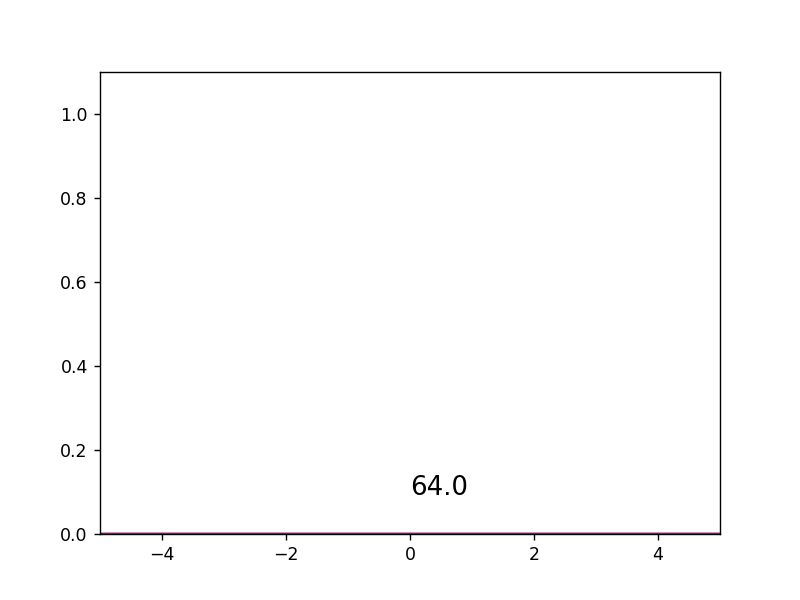

In [281]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(-5, 5), ylim=(0, E_final.max() + 0.1))
line, = ax.plot([], [], lw=2, color = 'blue')
line_true, = ax.plot([], [], lw=2, color = 'red')

time_stamp = ax.text(0.5,0.1,0,verticalalignment='center',
                        horizontalalignment='left',
                        transform=ax.transAxes,fontsize=15)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line_true.set_data([], [])
    return line, line_true

# animation function.  This is called sequentially
def animate(i):
    E_final_t = E_final[:len(z), i]
    line.set_data(z, E_final_t)
    
    E_true_t = E_true[:len(z), i]
    line_true.set_data(z, E_true_t)

    time_stamp.set_text(t_set[i])
    return line,line_true, time_stamp

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1200, interval=5, blit=False, repeat=True)

plt.show()